In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("GOOG_train.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
1,2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2,2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
3,2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
4,2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [8]:
df.Date= pd.to_datetime(df.Date)

In [9]:
df2 =df.set_index('Date')
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500
...,...,...,...,...,...,...
2021-06-03,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
2021-06-04,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
2021-06-07,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500


In [10]:
x_train = df.iloc[:,4:5].values
x_train

array([[ 719.409973],
       [ 718.359985],
       [ 718.27002 ],
       ...,
       [2466.090088],
       [2482.850098],
       [2491.399902]])

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x_train_scaled = sc.fit_transform(x_train)
x_train_scaled

array([[0.02805597],
       [0.02748005],
       [0.0274307 ],
       ...,
       [0.98611746],
       [0.9953104 ],
       [1.        ]])

In [12]:
x_train2 = []
y_train2 = []
for i in range(30,1258):                      #(timestep=30, lenght=1258)
  x_train2.append(x_train_scaled[i-30:i,0])
  y_train2.append(x_train_scaled[i,0])

x_train3, y_train3 = np.array(x_train2), np.array(y_train2)

In [13]:
x_train4 = np.reshape(x_train3,(x_train3.shape[0],x_train3.shape[1],1))
x_train4.shape

(1228, 30, 1)

In [14]:
y_train3.shape

(1228,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [16]:
model = Sequential()
 
model.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train4.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [17]:
hist = model.fit(x_train4, y_train3, epochs=20, batch_size=30, verbose=2)

Epoch 1/20
41/41 - 10s - loss: 0.0139 - 10s/epoch - 255ms/step
Epoch 2/20
41/41 - 0s - loss: 0.0025 - 401ms/epoch - 10ms/step
Epoch 3/20
41/41 - 0s - loss: 0.0023 - 426ms/epoch - 10ms/step
Epoch 4/20
41/41 - 0s - loss: 0.0021 - 412ms/epoch - 10ms/step
Epoch 5/20
41/41 - 0s - loss: 0.0022 - 420ms/epoch - 10ms/step
Epoch 6/20
41/41 - 0s - loss: 0.0019 - 415ms/epoch - 10ms/step
Epoch 7/20
41/41 - 0s - loss: 0.0017 - 427ms/epoch - 10ms/step
Epoch 8/20
41/41 - 0s - loss: 0.0020 - 412ms/epoch - 10ms/step
Epoch 9/20
41/41 - 0s - loss: 0.0018 - 416ms/epoch - 10ms/step
Epoch 10/20
41/41 - 0s - loss: 0.0018 - 422ms/epoch - 10ms/step
Epoch 11/20
41/41 - 0s - loss: 0.0016 - 411ms/epoch - 10ms/step
Epoch 12/20
41/41 - 0s - loss: 0.0016 - 420ms/epoch - 10ms/step
Epoch 13/20
41/41 - 0s - loss: 0.0014 - 406ms/epoch - 10ms/step
Epoch 14/20
41/41 - 0s - loss: 0.0017 - 413ms/epoch - 10ms/step
Epoch 15/20
41/41 - 0s - loss: 0.0016 - 417ms/epoch - 10ms/step
Epoch 16/20
41/41 - 0s - loss: 0.0016 - 407ms/epo

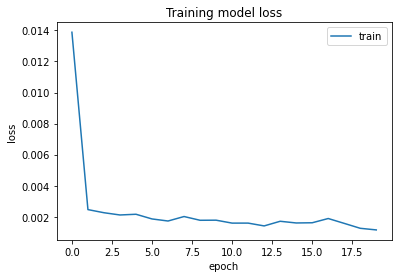

In [18]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [19]:
test = pd.read_csv("GOOG_test.csv")
test.Date= pd.to_datetime(test.Date)
test2 =test.set_index('Date')
testData = test2.iloc[:,4:5].values
testData2 = sc.transform(testData)

x_test = []
y_test = []
for i in range(30,len(testData)):
  x_test.append(testData2[i-30:i,0])
  y_test.append(testData[i,0])
x_test2 = np.array(x_test)
x_test3 = np.reshape(x_test2,(x_test2.shape[0],x_test2.shape[1],1))
x_test3.shape

(223, 30, 1)

In [20]:
y_pred = model.predict(x_test3)

In [21]:
predicted_price = sc.inverse_transform(y_pred)

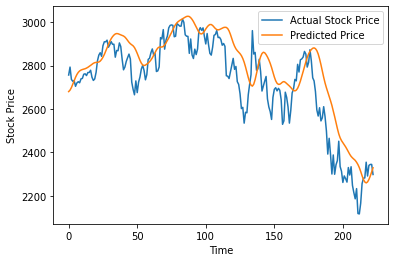

In [22]:
plt.plot(y_test, label='Actual Stock Price')
plt.plot(predicted_price, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predicted_price))

118.600414524254

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted_price)

0.6849511777480826